In [5]:
file_path <- file.choose()
print(file_path)


[1] "C:\\Users\\Student\\Desktop\\OEL DATASETS PFAI\\Task 3\\online_retail_II.xlsx"


In [8]:
colnames(data)


[1] "Invoice"     "StockCode"   "Description" "Quantity"    "InvoiceDate"
[6] "Price"       "Customer ID" "Country"

Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
<chr>,<chr>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<chr>
489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


   Invoice           StockCode         Description           Quantity       
 Length:525461      Length:525461      Length:525461      Min.   :-9600.00  
 Class :character   Class :character   Class :character   1st Qu.:    1.00  
 Mode  :character   Mode  :character   Mode  :character   Median :    3.00  
                                                          Mean   :   10.34  
                                                          3rd Qu.:   10.00  
                                                          Max.   :19152.00  
                                                                            
  InvoiceDate                         Price            Customer ID    
 Min.   :2009-12-01 07:45:00.00   Min.   :-53594.36   Min.   :12346   
 1st Qu.:2010-03-21 12:20:00.00   1st Qu.:     1.25   1st Qu.:13983   
 Median :2010-07-06 09:51:00.00   Median :     2.10   Median :15311   
 Mean   :2010-06-28 11:37:36.84   Mean   :     4.69   Mean   :15361   
 3rd Qu.:2010-10-15 12:45:00.

Invoice   StockCode Description    Quantity InvoiceDate       Price 
          0           0        2928           0           0           0 
Customer ID     Country 
     107927           0

[1] "Cleaned dataset saved at: C:/Users/Student/Desktop/OEL DATASETS PFAI/Task 3/cleaned_online_retail.csv"


ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'UnitPrice' not found

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 

ERROR: [1m[33mError[39m in `summarise()`:[22m
[1m[22m[36mℹ[39m In argument: `TotalSales = sum(Quantity * UnitPrice, na.rm = TRUE)`.
[36mℹ[39m In group 1: `Country = "Australia"`.
[1mCaused by error:[22m
[33m![39m object 'UnitPrice' not found


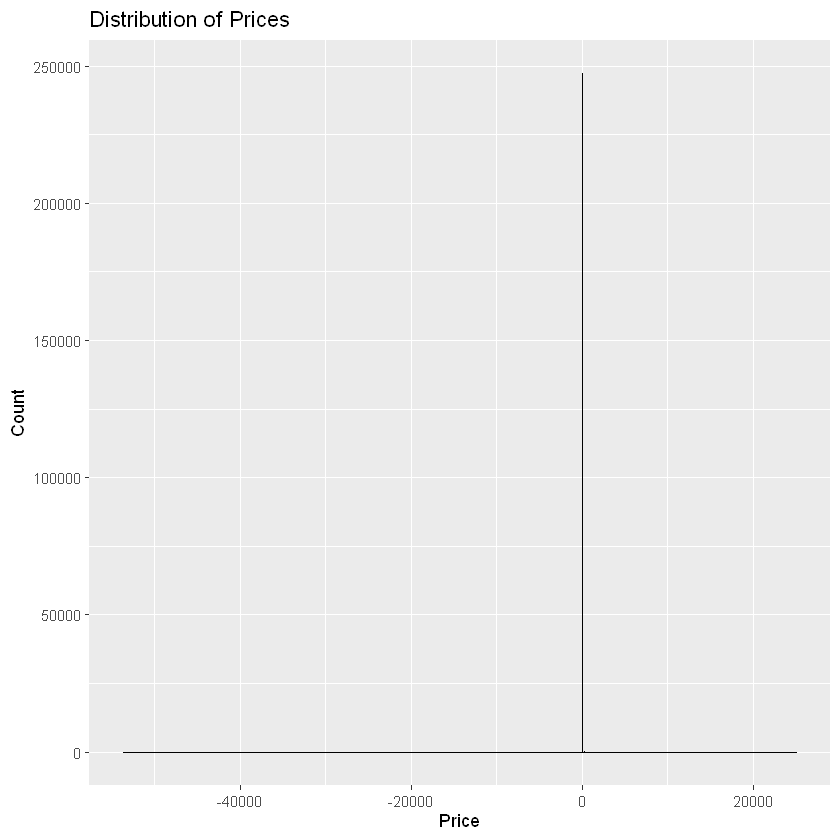

In [9]:
# Task 3: Online Retail Dataset Analysis

# Install Required Libraries if Not Installed
if (!require(readxl)) install.packages("readxl")  
if (!require(ggplot2)) install.packages("ggplot2")  
if (!require(dplyr)) install.packages("dplyr")    

# Load Required Libraries
library(readxl)
library(ggplot2)
library(dplyr)

# Load the Dataset (Ensure File Path is Correct)
data <- read_excel("C:/Users/Student/Desktop/OEL DATASETS PFAI/Task 3/online_retail_II.xlsx")

# Display the First 5 Rows
head(data, 5)

# Get Basic Summary Statistics
summary(data)

# Identify Missing Values
colSums(is.na(data))

# Clean the Dataset (Remove NAs)
cleaned_data <- na.omit(data)

# Save Cleaned Dataset as CSV
output_path <- "C:/Users/Student/Desktop/OEL DATASETS PFAI/Task 3/cleaned_online_retail.csv"
write.csv(cleaned_data, output_path, row.names = FALSE)
print(paste("Cleaned dataset saved at:", output_path))

# -------------------------------
# Data Visualization Section
# -------------------------------

# Histogram of Unit Prices
ggplot(data, aes(x = Price)) +
  geom_histogram(binwidth = 2, fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Prices", x = "Price", y = "Count")


# Scatter Plot of Quantity vs. Unit Price
ggplot(cleaned_data, aes(x = Quantity, y = UnitPrice)) +
  geom_point(color = "red", alpha = 0.6) +
  labs(title = "Quantity vs. Unit Price", x = "Quantity", y = "Unit Price")



# Bar Plot: Total Sales by Country
if("Country" %in% colnames(cleaned_data)) {
  cleaned_data %>%
    group_by(Country) %>%
    summarise(TotalSales = sum(Quantity * UnitPrice, na.rm = TRUE)) %>%
    ggplot(aes(x = reorder(Country, -TotalSales), y = TotalSales, fill = Country)) +
    geom_bar(stat = "identity") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    labs(title = "Total Sales by Country", x = "Country", y = "Total Sales")
}

# Save the Last Plot
ggsave("C:/Users/Student/Desktop/OEL DATASETS PFAI/Task 3/online_retail_visualization.png", width = 8, height = 5)

print("Task 3 Completed Successfully!")
